In [25]:
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Tuple
import random
from time import perf_counter_ns
import networkx as nx

RAND_SEED = 69
INF = float('inf') # Infinity
    
random.seed(RAND_SEED)

In [26]:
def generate_graph(N: int, p: float = 0.2, undirected: bool = False):
    adjacency_matrix = [[INF] * N for _ in range(N)]
    E = []
    for i in range(N):
        adjacency_matrix[i][i] = 0
        if undirected:
            for j in range(i + 1, N):
                if random.random() < p:
                    adjacency_matrix[i][j] = random.randint(1, 9)
                    E.append((i, j, adjacency_matrix[i][j]))
                    # Symnmetric matrix since undirected graph.
                    adjacency_matrix[j][i] = adjacency_matrix[i][j]
        else:
            for j in range(N):
                if i != j and random.random() < p:
                    adjacency_matrix[i][j] = random.randint(1, 9)
                    E.append((i, j, adjacency_matrix[i][j]))
    return adjacency_matrix, E

def to_edges(adjacency_matrix: List[List[int]]):
    edges = []
    for i in range(len(adjacency_matrix)):
        for j in range(len(adjacency_matrix[i])):
            if adjacency_matrix[i][j] != 0 and adjacency_matrix[i][j] != INF:
                edges.append((i, j, adjacency_matrix[i][j]))
    return edges

def print_adjacency_matrix(adjacency_matrix: List[List[int]]):
    for row in adjacency_matrix:
        for val in row:
            if val == INF:
                print(" ", end=" ")
            else:
                print(val, end=" ")
        print()


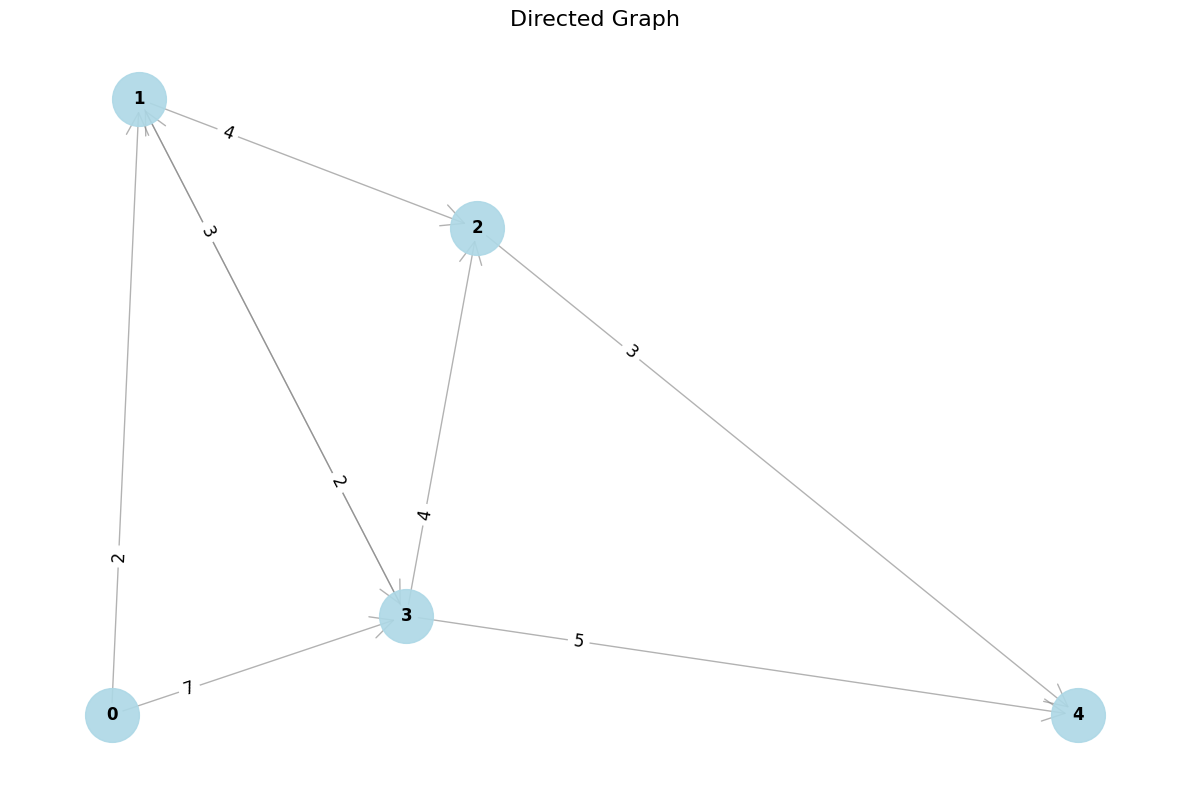

In [ ]:
adjacency_matrix = [
  [0, 2, INF, 7, INF],
  [INF, 0, 4, 3, INF],
  [INF, INF, 0, INF, 3],
  [INF, 2, 4, 0, 5],
  [INF, INF, INF, INF, 0],
]

E = to_edges(adjacency_matrix)

# Use DiGraph for directed edges
G = nx.DiGraph()
G.add_weighted_edges_from(E)
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(12, 8))

# Draw directed edges with arrows
nx.draw_networkx_edges(G, pos, edge_color='gray', width=1, alpha=0.6, 
                      arrows=True, arrowsize=40, arrowstyle='->')

# Draw highlighted edges (thick, red)
# nx.draw_networkx_edges(G, pos, edgelist=highlighted_route, 
#                     edge_color='red', width=4, alpha=0.8, arrows=True, arrowsize=20)

nx.draw_networkx_nodes(G, pos, node_color='lightblue', 
                    node_size=1500, alpha=0.9)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=12, label_pos=0.25)

plt.title("Directed Graph", size=16)
plt.axis('off')
plt.tight_layout()
plt.show()

# Context
> n the Dijkstra’s algorithm, the choice of the input graph representation and the priority queue implementation will affect its time complexity

# (a) Suppose the input graph G = (V, E) is stored in an adjacency matrix and we use an array for the priority queue. Implement the Dijkstra’s algorithm using this setting and analyze its time complexity with respect to |V| and |E| both theoretically and empirically.

In [ ]:
def dijkstra(adjacency_matrix: List[List[int]], start: int, end: int):
    visited = set()
    next = [start]
    node_parent_and_distances = [
        (INF, None) for _ in range(len(adjacency_matrix))
    ]
    node_parent_and_distances[start] = (0, None)
    while len(next) > 0:
        # Find the node with the smallest distance.
        considered = [x for x in next if node_parent_and_distances[x][0] != INF]
        if len(considered) == 0:
            break
        cur = min(considered, key=lambda x: node_parent_and_distances[x][0])

        next.remove(cur)
        visited.add(cur)
        
        cur_dist = node_parent_and_distances[cur][0]
        neighbours = adjacency_matrix[cur]
        for i, dist in enumerate(neighbours):
            if dist != INF and i not in visited:
                if cur_dist + dist < node_parent_and_distances[i][0]:
                    node_parent_and_distances[i] = (cur_dist + dist, cur)
                    if i not in next:
                        next.append(i)

    # Get route.
    d, prev_node = node_parent_and_distances[end]
    if prev_node == None:
        return None 
    route = [end]
    while prev_node != None:
        route.append(prev_node)
        _, prev_node = node_parent_and_distances[prev_node]

    route.reverse()
    return route, d

res = dijkstra(adjacency_matrix, 0, 4)
if res == None:
    raise Exception("no path found")
route, d = res
print(route, d)

[0, 1, 2, 4] 9


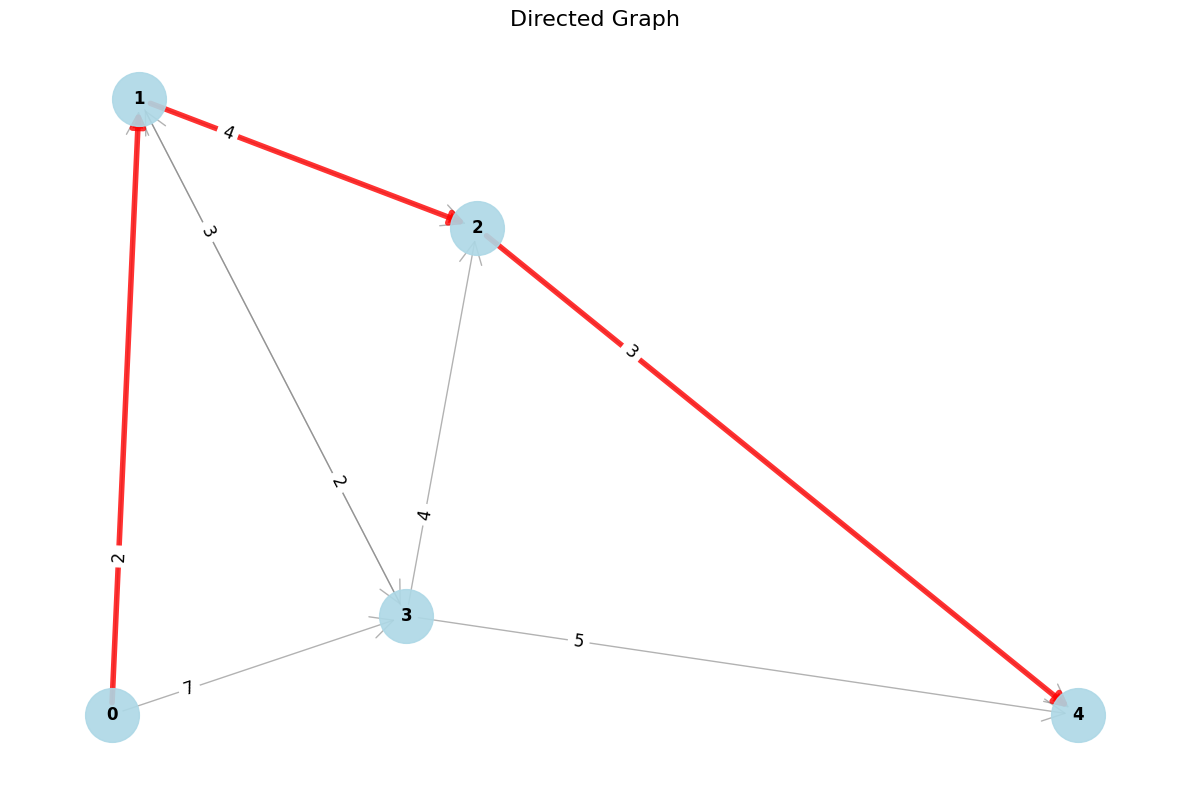

In [34]:
highlighted_route = []
for i in range(1, len(route)):
    highlighted_route.append((route[i-1], route[i]))

E = to_edges(adjacency_matrix)

# Use DiGraph for directed edges
G = nx.DiGraph()
G.add_weighted_edges_from(E)
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(12, 8))

# Draw directed edges with arrows
nx.draw_networkx_edges(G, pos, edge_color='gray', width=1, alpha=0.6, 
                      arrows=True, arrowsize=40, arrowstyle='->')

# Draw highlighted edges (thick, red)
nx.draw_networkx_edges(G, pos, edgelist=highlighted_route, 
                    edge_color='red', width=4, alpha=0.8, arrows=True, arrowsize=20)

nx.draw_networkx_nodes(G, pos, node_color='lightblue', 
                    node_size=1500, alpha=0.9)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=12, label_pos=0.25)

plt.title("Directed Graph", size=16)
plt.axis('off')
plt.tight_layout()
plt.show()

[0, 9, 10, 11] 13


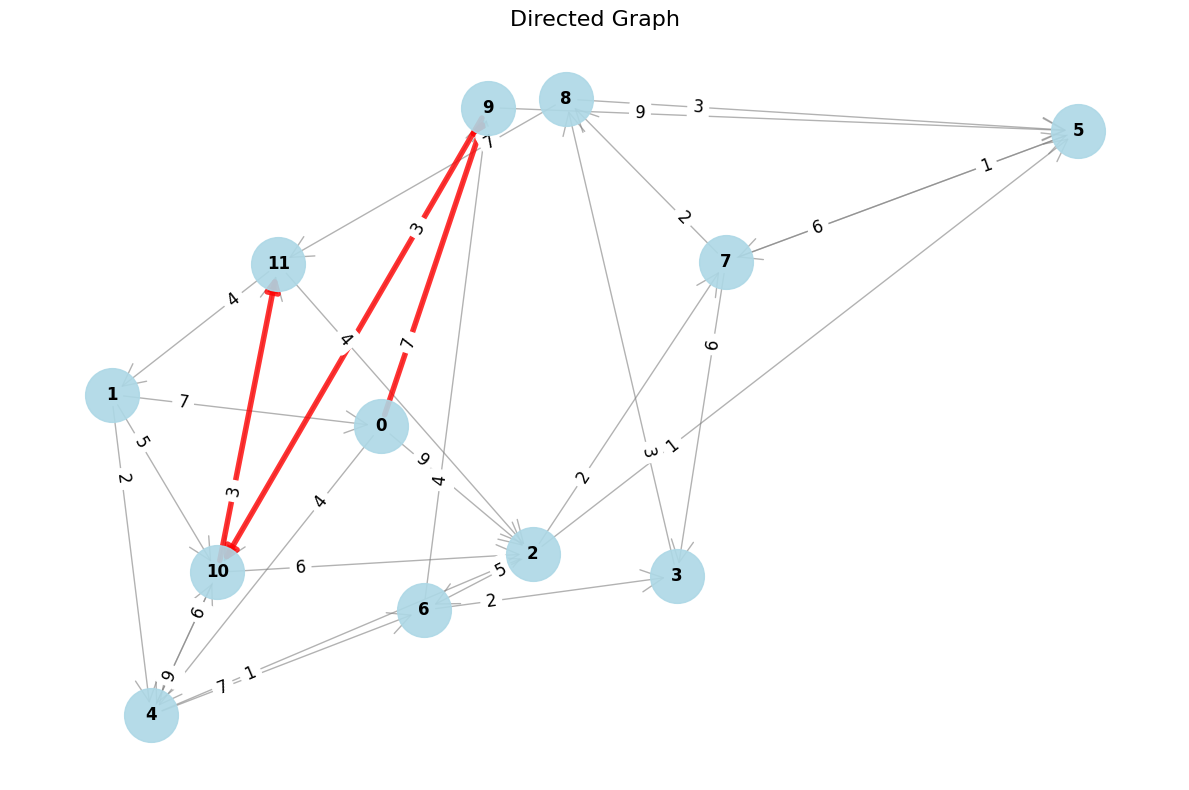

In [64]:
N = 12
adjacency_matrix, E = generate_graph(N, p=0.2)

res = dijkstra(adjacency_matrix, 0, N-1)
if res == None:
    raise Exception("no path found")
route, d = res
print(route, d)

highlighted_route = []
for i in range(1, len(route)):
    highlighted_route.append((route[i-1], route[i]))

G = nx.DiGraph()
G.add_weighted_edges_from(E)
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(12, 8))

# Draw directed edges with arrows
nx.draw_networkx_edges(G, pos, edge_color='gray', width=1, alpha=0.6, 
                      arrows=True, arrowsize=40, arrowstyle='->')

# Draw highlighted edges (thick, red)
nx.draw_networkx_edges(G, pos, edgelist=highlighted_route, 
                    edge_color='red', width=4, alpha=0.8, arrows=True, arrowsize=20)

nx.draw_networkx_nodes(G, pos, node_color='lightblue', 
                    node_size=1500, alpha=0.9)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=12, label_pos=0.25)

plt.title("Directed Graph", size=16)
plt.axis('off')
plt.tight_layout()
plt.show()